# Wstęp teoretyczny


Na wykładzie kontynuowalismy temat wyrażeń regularnych. Możemy na przykład szukać zbiorów znaków umieszczając ich zakres w nawiasach `jakies_wyrażenie = [A-Z]`. Częściej uzywa się tzw. grupy znaków:
* \d- dowolna cyfra
* \s- dowolny znak biały
* \w- dowolny znak alfanumeryczny lub podkreslnik_.

Poznalismy przydatne funkcje do przeszukiwania:
* re.search(tekst) - zwraca lokalizacj ̨epierwszegoznalezionegodopasowania wzorca.
* re.finditer(tekst) - zwraca iterator z lokalizacjami wszystkich znalezionych dopasowań wzorca.
* re.split(separator, tekst) - rozbija dany napis na pod napisy wzgledem zadanego separatora (wyrażenia regularnego).

Poruszyliśmy temat operacji na plikach. Gdzie zaczelismy od scieżek katalogowych, które dzielimy na:
* wzgledne - podaja one połozenie zasobu systemu plikóww odniesieniudo katalogu biezacego 
* bezwzględne -  niezaleznie od danego kontekstu,zawsze wskazujaw sposób dokładny lokalizacje danego zasobu

Póżniej były operacje na żródłach lokalnych. Aby otworzyć plik tekstowy używamy funkcji `open(path, mode`. Przyjmuje ona dwa argumenty:  ́sciezke i parametr trybu dostepu. Mamy trzy tryby dostepu:
* "r" (ang. read) - wartosc domyslna, do odczytu; brak pliku implikuje zgłoszenie wyjatku.
* "w" (ang. write) - do zapisu; brak pliku implikuje jego utworzenie, a jesli istnieje to jest zastepowany nowym i pustym plikiem.
* "a" (ang. append) - tryb dopisywania zawartosci na koncu pliku; brak pliku implikuje utworzenie nowego.

Korzysta się również z funkcji 
```python
with open(sciezka, mode) as f:
#instrukcje ```

Co jest równoważne:
```python
f = open(sciezka, mode)
f.__enter__()
try:
    #instrukcje
finally:   
    f.__exit__()
    ```
Jest ona bardziej funkcjonalna.


# Zadanie 1

In [7]:
import os
import glob
import pickle
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt

min: -0.9482 
max: 0.9482


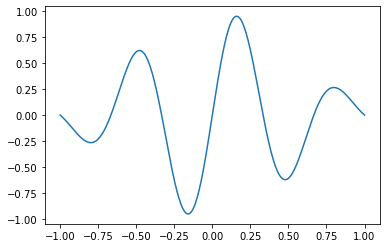

In [19]:
x = []
y = []
with open("Zadanie_1.dat", "r") as f:
    for line in f:
        p=re.compile('-?\d+[\.]?\d*')
        tab=p.findall(line)
        x.append(float(tab[0])) 
        y.append(float(tab[1]))
tab = np.array([x,y])
print("min: {} \nmax: {}".format(min(tab[1]),max(tab[1])))
plt.plot(x,y)

Za pomocą wyrażen regularnych rozdzieliłem kolumny w pliku na wartosci x i y i zwizualizowałem je w matplotlb.

# Zadanie 2

In [34]:
x1=[]
y1=[]
with open("Zadanie_2_powietrze.dat", "r") as f:
    for line in f:
        p=re.compile('-?\d+\.*\d*')
        tab=p.findall(line)
        if len(tab)==2:
            x1.append(float(tab[0]))
            y1.append(float(tab[1]))

x2=[]
y2=[]
with open("Zadanie_2_woda.dat", "r") as f:
    for line in f:
        p=re.compile('\d+\.*\d+')
        tab=p.findall(line)
        if tab:
            x2.append(float(tab[0]))
            y2.append(float(tab[1]))


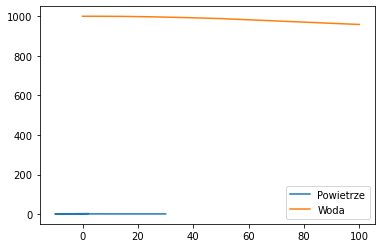

In [35]:
plt.plot(x1,y1,label="Powietrze")
plt.plot(x2,y2,label="Woda")
plt.legend()
plt.show()

Za pomocą wyrażen regularnych rozdzieliłem kolumny w pliku na wartosci x i y dla plików z danymi dla powietrza i wody. Następnie je zwizualizowłem. .

# Zadanie 3

In [11]:
m1 = np.polyfit(x1,y1,1)
m2 = np.polyfit(x2,y2,1)
print("Dopasowanie dla powietrza: y={0:.4f}x+{1:.4f}".format(m1[0],m1[1]))
print("Dopasowanie dla wody: y={0:.4f}x+{1:.4f}".format(m2[0],m2[1]))

Dopasowanie dla powietrza: y=-0.0044x+1.2934
Dopasowanie dla wody: y=-0.4212x+1004.9542


 
-0.00442 x + 1.293


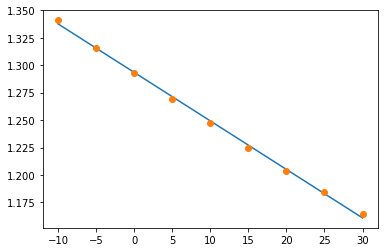

In [12]:
pn1 = np.poly1d(m1)
print(pn1)
plt.plot(x1, pn1(x1))
plt.plot(x1,y1,"o")
plt.show()

 
-0.4212 x + 1005


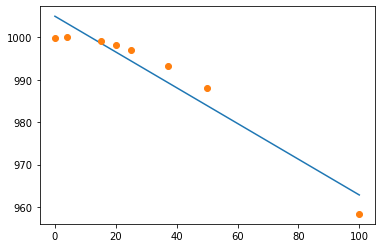

In [13]:
pn2 = np.poly1d(m2)
print(pn2)
plt.plot(x2, pn2(x2)) 
plt.plot(x2,y2,"o")
plt.show()

In [14]:
m1_w2 = np.polyfit(x1,y1,2)
m2_w2 = np.polyfit(x2,y2,2)
pn1_w2 = np.poly1d(m1_w2)
pn2_w2 = np.poly1d(m2_w2)

def dop(pn,x,y):
    return (np.sum((pn(x)-y)**2))/len(x)

print("Jakość dop dla powietrza(wielomian 1 stopnia): {}".format(dop(pn1,x1,y1)))
print("Jakość dop dla wody(wielomian 1 stopnia): {}\n".format(dop(pn2,x2,y2)))

print("Jakość dop dla powietrza(wielomian 2 stopnia): {}".format(dop(pn1_w2,x1,y1)))
print("Jakość dop dla wody(wielomian 2 stopnia): {}".format(dop(pn2_w2,x2,y2)))

Jakość dop dla powietrza(wielomian 1 stopnia): 4.32839506172807e-06
Jakość dop dla wody(wielomian 1 stopnia): 12.46746655908783

Jakość dop dla powietrza(wielomian 2 stopnia): 6.849446849445987e-08
Jakość dop dla wody(wielomian 2 stopnia): 0.10868684915315942


In [99]:
def Rkwadrat(pn,x,y):
    y_avg = np.mean(y)
    return (np.sum((pn(x)-y_avg)**2))/(np.sum((y-y_avg)**2))
print("Współczynnik determinacji dla powietrza: {}".format(Rkwadrat(pn1,x1,y1)))
print("Współczynnik determinacji dla wody: {}\n".format(Rkwadrat(pn2,x2,y2)))

Współczynnik determinacji dla powietrza: 0.11646003442757778
Współczynnik determinacji dla wody: 0.9281250646119444



Korzystając z danych z poprzedniego zadania wyszukiwałem równań prostych dopasowanych do nich. Póżniej napisalismy funkcje które testowały jakość dopasowania i wyznaczały wzpółczynnik determinacji.

# Zadanie 4

In [43]:
def zapisz_dane(a, b, fun, n, fname):
    dane=""
    with open(fname, "w") as f:
        for x in np.linspace(a,b,n):
            y = fun(x)
            dane += str(x)+ "\t" +str(y)+"\n"
        
        f.write(dane)
        
def f1(x):
    return np.exp(2*x)*np.sin(10*x)

def f2(x):
    return 2*np.sin(3*x)

def f3(x):
    return 3*x**3-2*x**2+1

zapisz_dane(0,100,f1,100,"dane_f1.txt")
zapisz_dane(0,100,f2,100,"dane_f2.txt")
zapisz_dane(0,100,f3,100,"dane_f3.txt")

Napisałem funkcje która zapisywała dane w plikach.

# Zadanie 5

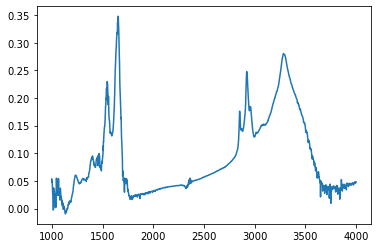

In [50]:
lfalowe=[]
Abs=[]
with open("Zadanie_5_DANE.dpt", "r") as f:
    for i in f:
        sp=i.rstrip()
        tab=sp.split(',')
        lfalowe.append(float(tab[0]))
        Abs.append(float(tab[1]))

lfalowe=np.array(lfalowe)
Abs=np.array(Abs)

plt.plot(lfalowe,Abs)
plt.show()

In [54]:
def norm_zero_jeden(Abs):
    return (Abs-min(Abs))/(max(Abs)-min(Abs))

def euklides(Abs):
    return sum(np.sqrt(Abs**2))

def norm_wektorowa(Abs):
    return Abs/(euklides(Abs))

def norm_SNV(Abs):
    return (Abs-np.mean(Abs))/np.std(Abs)

print("Normalizacja zero-jedynkowa: {}\n".format(norm_zero_jeden(Abs)))
print("Normalizacja wektorowa: {}\n".format(norm_wektorowa(Abs)))
print("Normalizacja SNV: {}\n".format(norm_SNV(Abs)))

Normalizacja zero-jedynkowa: [0.17662679 0.16952706 0.16304226 ... 0.1611136  0.16125335 0.16153287]

Normalizacja wektorowa: [9.58989617e-05 9.13374755e-05 8.71710787e-05 ... 8.59319348e-05
 8.60217278e-05 8.62013139e-05]

Normalizacja SNV: [-0.50093592 -0.53630322 -0.56860721 ... -0.57821486 -0.57751865
 -0.57612624]



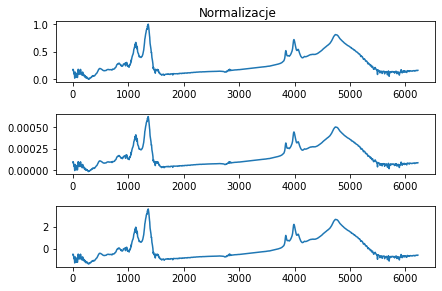

In [70]:
fig, (ax1,ax2,ax3) =plt.subplots(3)
fig.suptitle('Normalizacje', y=1)
fig.tight_layout()
ax1.plot(norm_zero_jeden(Abs))
ax2.plot(norm_wektorowa(Abs))
ax3.plot(norm_SNV(Abs))


Kolejny raz odzielałem dane w plikach i wpisywałem do x i y. Następnie zwizualizowałem dane używająć trzech transformacji.

# Zadanie 6

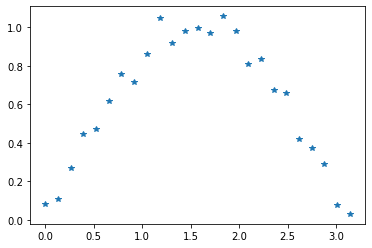

In [96]:
x=[]
y=[]
k=0
with open("Zadanie_6_pos.dat","r") as f:
    k=float(f.readlines()[0])
    f.seek(0)
    for line in f:
        p=re.compile('\d*\.\d*')
        tab=p.findall(line)
        if tab:
            x.append(float(tab[0]))
            y.append(float(tab[1]))
plt.plot(x,y,'*')

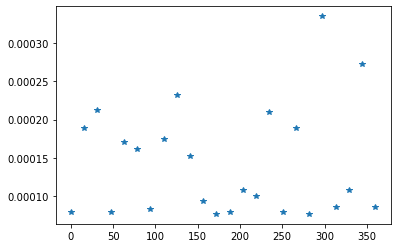

In [97]:
def V_g(tab,k):
    l=len(tab)
    v=[]
    for i in range(0,l-1):
        v.append((tab[i+1]-tab[i])/k)
    return v

x=np.array(V_g(x,k))
y=np.array(V_g(y,k))
v_moduł=np.abs(x**2+y**2)
t = np.linspace(0,len(v_moduł)*k,len(v_moduł))
plt.plot(t,v_moduł,"*")

Pierwsze zadanie było zwizualizowaniem położenia geparda w trakcei badań a drugie napisanie funkcji opisującej predkość geparda w badanych punktach i zwizualizowanie jej w funkcji czasu.

# Wniosek

Praca z plikami była dla mnie niezłym wyzwaniem i miksem nabytych już umiejętności. Umiejętność ta przydaje mi się już w pisaniu innych sprawozdań gdzie trzeba operować na plikach.

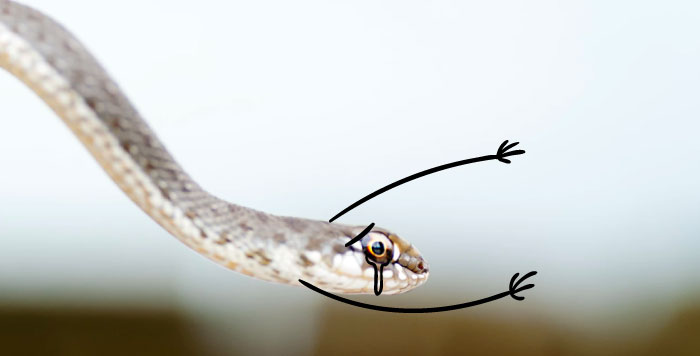